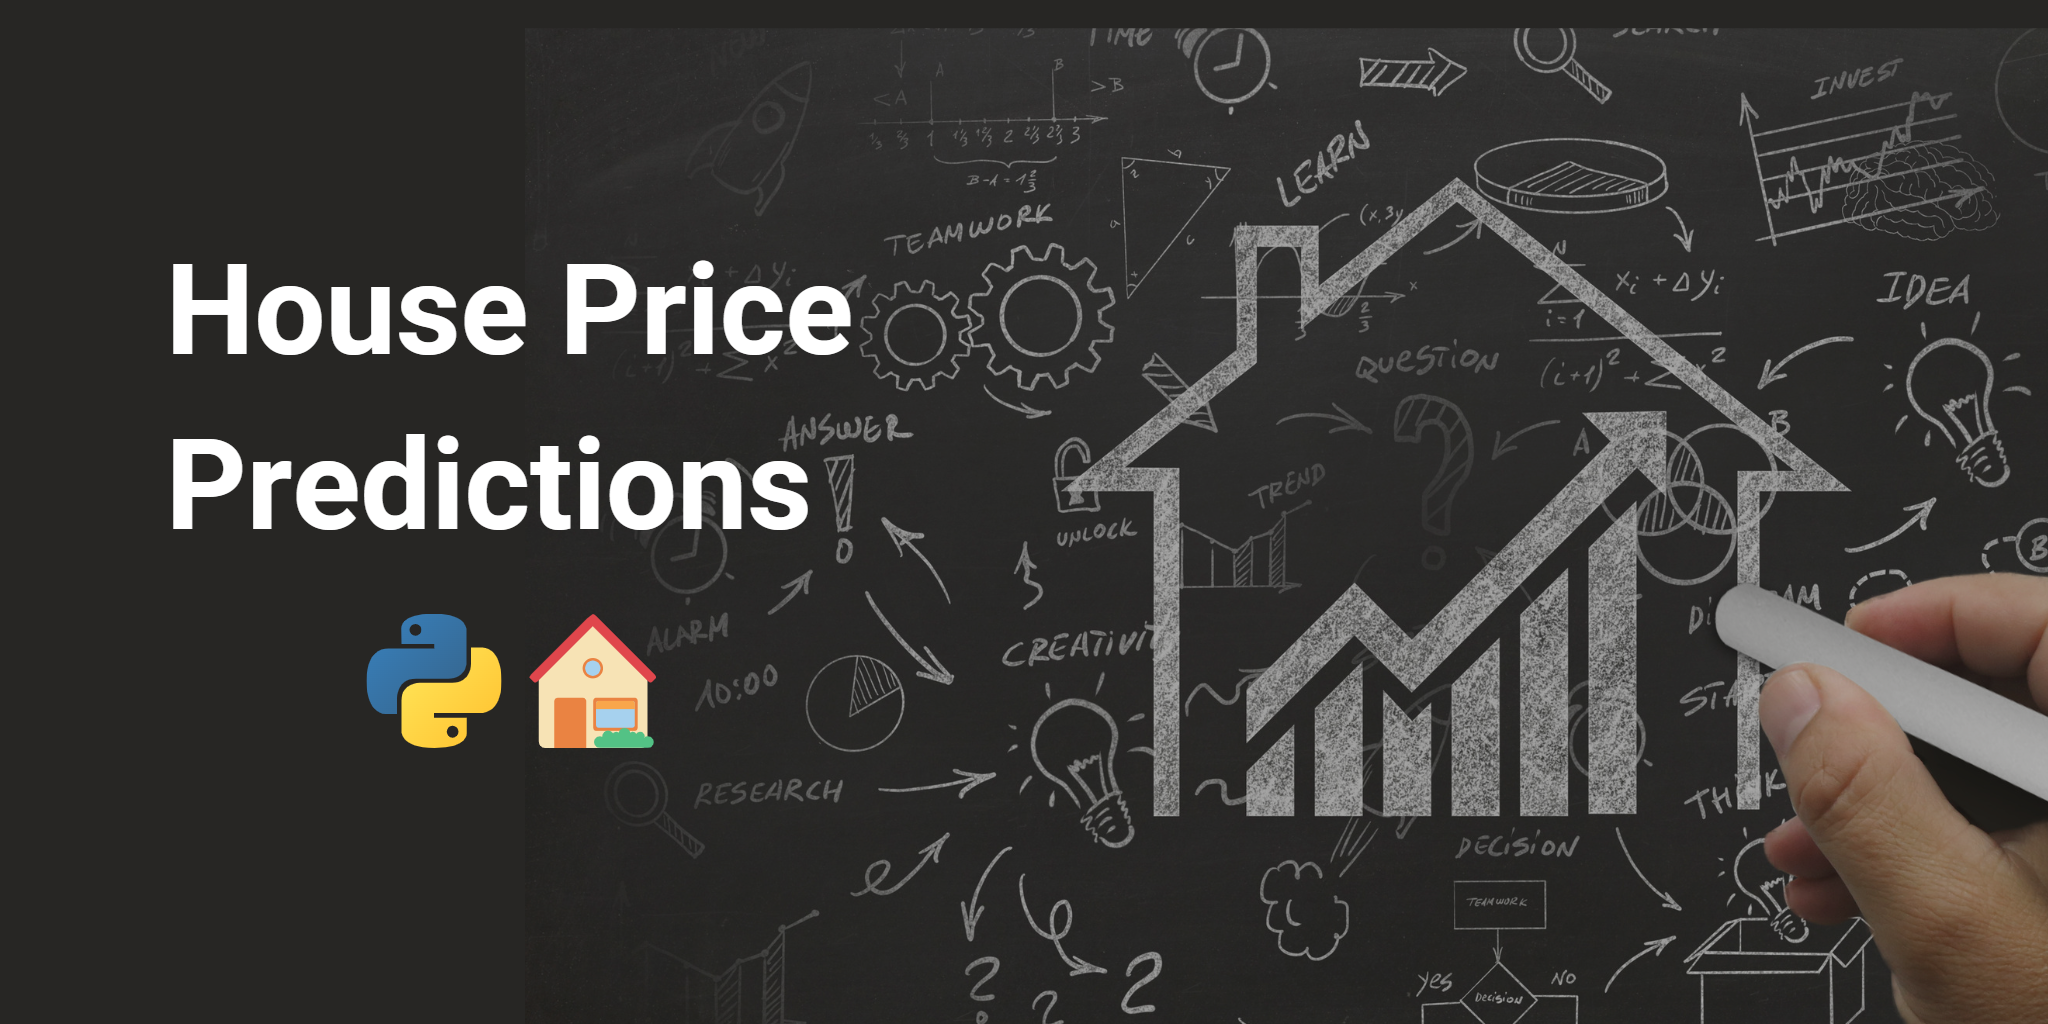

**Goal of the project:**

***The goal of this project is to build a machine learning model that can accurately predict the prices of houses based on a range of features. The model will be trained on a dataset of historical housing prices and their associated attributes such as the number of bedrooms, bathrooms, square footage, location, and other factors. The ultimate objective of the project is to create a tool that can help potential home buyers, sellers, and real estate agents to estimate the fair market value of a property based on its features.***



**THE METHOD:**

*   Cross Validation: Using 5-fold cross-validation
*   4 different advanced regression models were used to predict house prices. Models were XGBoost, LightGBM, Gradient Boosting, Random Forest
* Root Mean Squared Error (RMSE) was used as the metric to evaluate the models success






# IMPORTING PACKAGES AND DATASETS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("husl", 10)
import missingno as msno

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p, log1p

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import DataConversionWarning
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

# Exploration Analysis

In [ ]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [ ]:
correlations = df_train.corr()
correlations['SalePrice'].apply(abs).sort_values(ascending=False).iloc[:21]

SalePrice      1.000
OverallQual    0.791
GrLivArea      0.709
GarageCars     0.640
GarageArea     0.623
TotalBsmtSF    0.614
1stFlrSF       0.606
FullBath       0.561
TotRmsAbvGrd   0.534
YearBuilt      0.523
YearRemodAdd   0.507
GarageYrBlt    0.486
MasVnrArea     0.477
Fireplaces     0.467
BsmtFinSF1     0.386
LotFrontage    0.352
WoodDeckSF     0.324
2ndFlrSF       0.319
OpenPorchSF    0.316
HalfBath       0.284
LotArea        0.264
Name: SalePrice, dtype: float64

Those are the most 20 correlated features with the target variable

In [ ]:
selected_features = []

for col in df_train.columns:
  try:
    if abs(correlations[col]['SalePrice']) > .25:
      selected_features.append(col)
  except:
    pass

<AxesSubplot:>

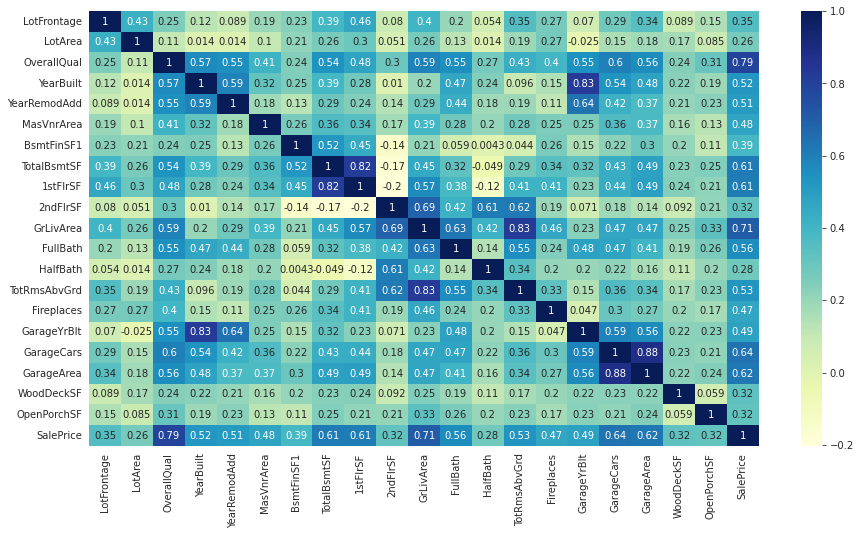

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train[selected_features].corr(), annot=True, cmap='YlGnBu')

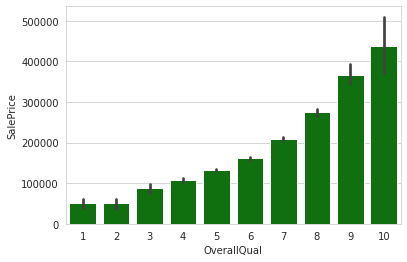

In [ ]:
sns.barplot(x = 'OverallQual', y = 'SalePrice', color = 'green', data = df_train)
plt.show()

The feature that describe the quality of the material used for the house (OverallQual) seems quite reliable.

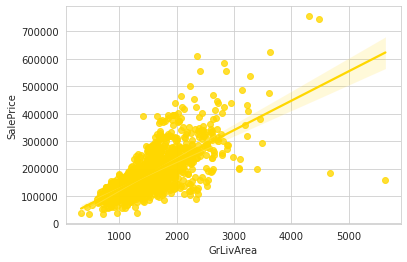

In [ ]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', color = 'gold', data = df_train)
plt.show()

The living square feet (GrLivArea) are linear related with the price sale (SalePrice)

In [ ]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

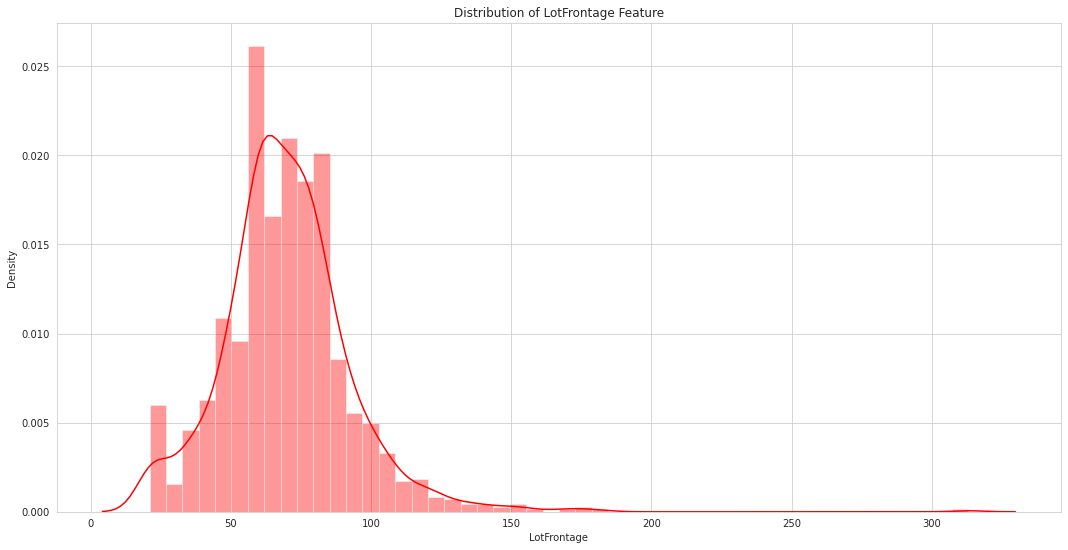

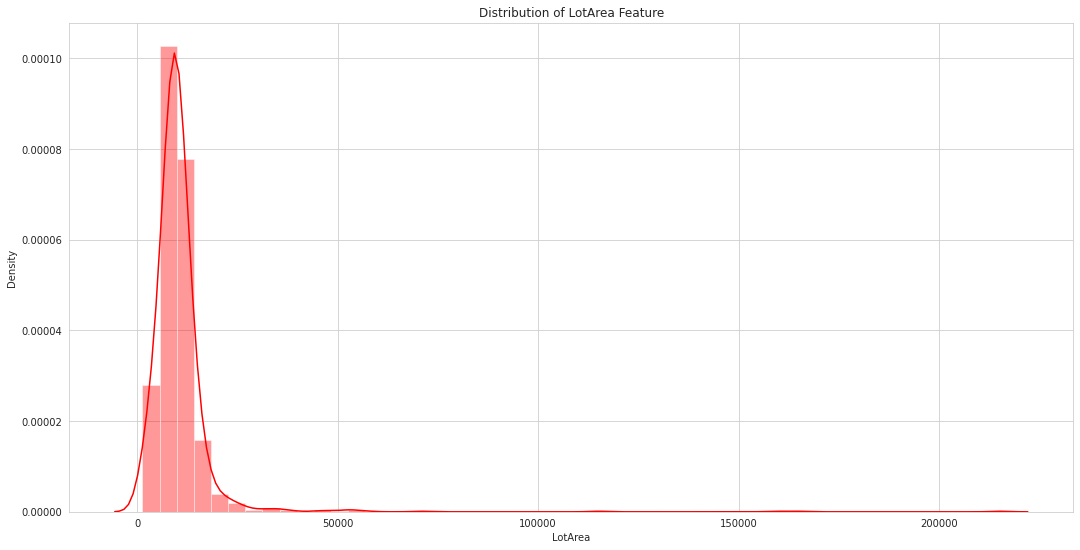

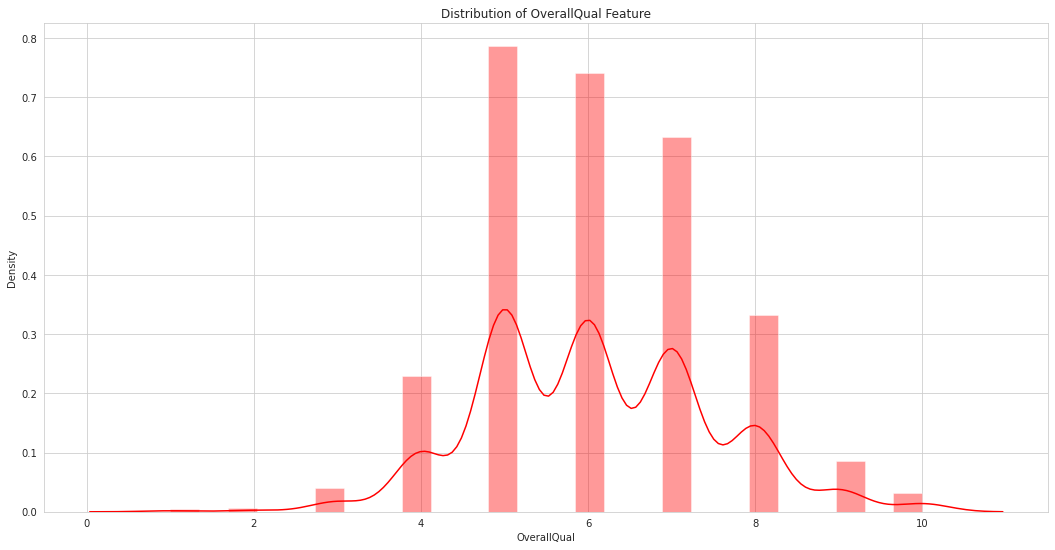

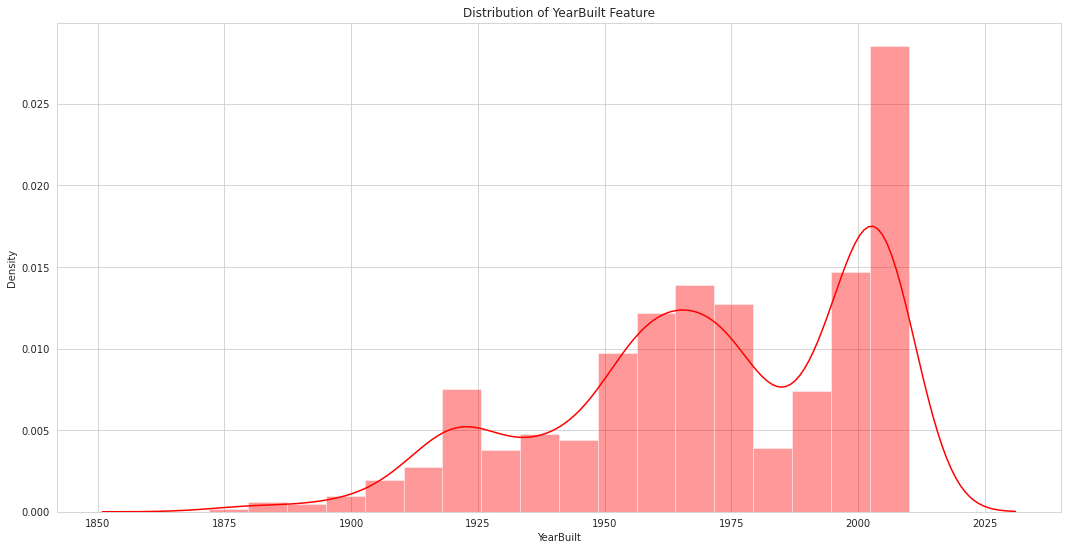

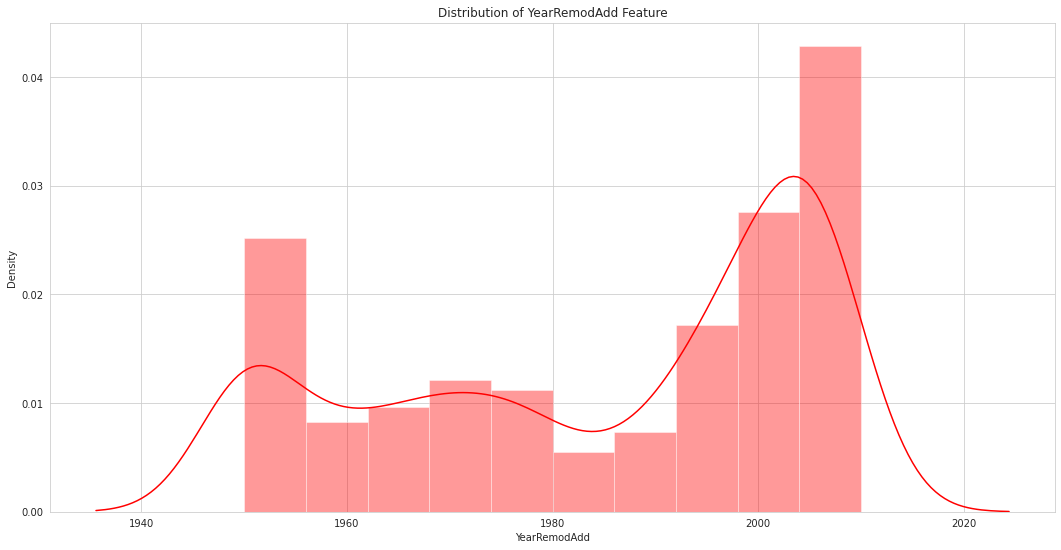

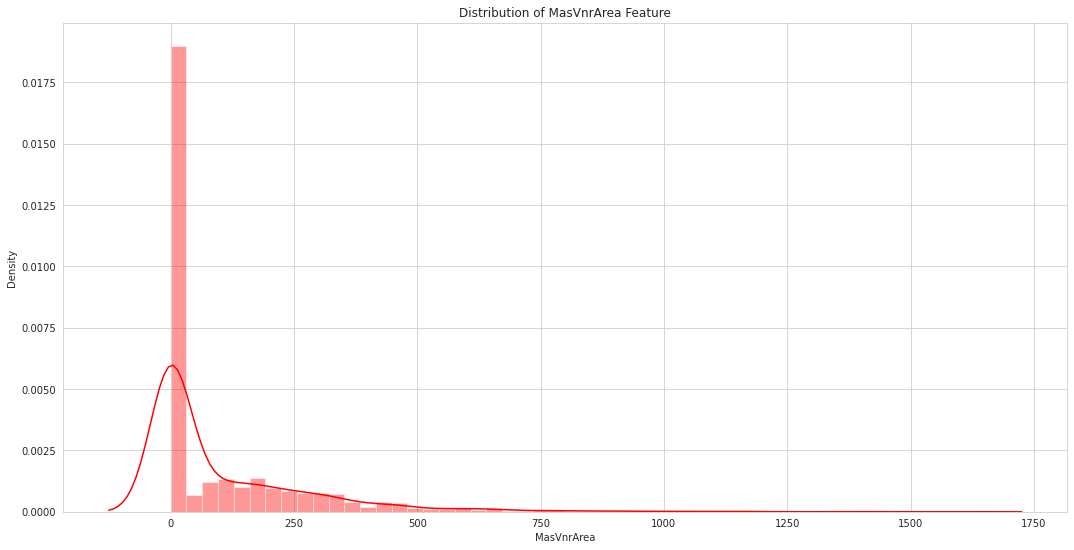

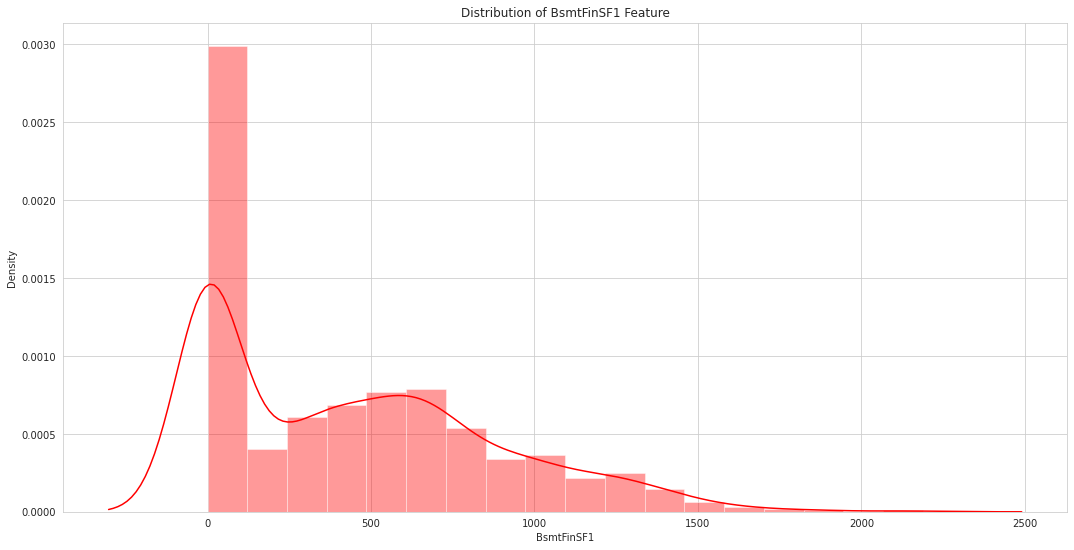

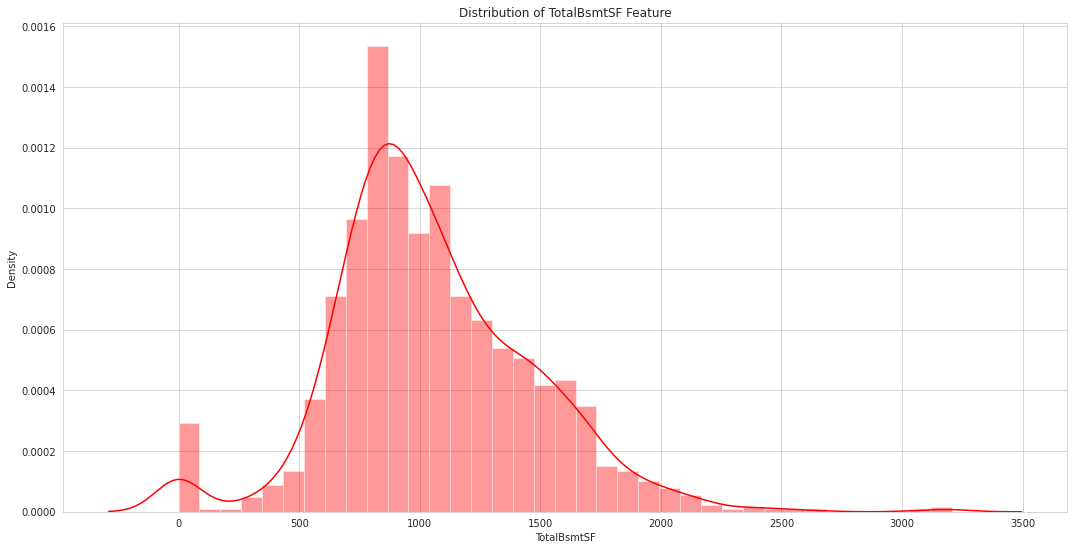

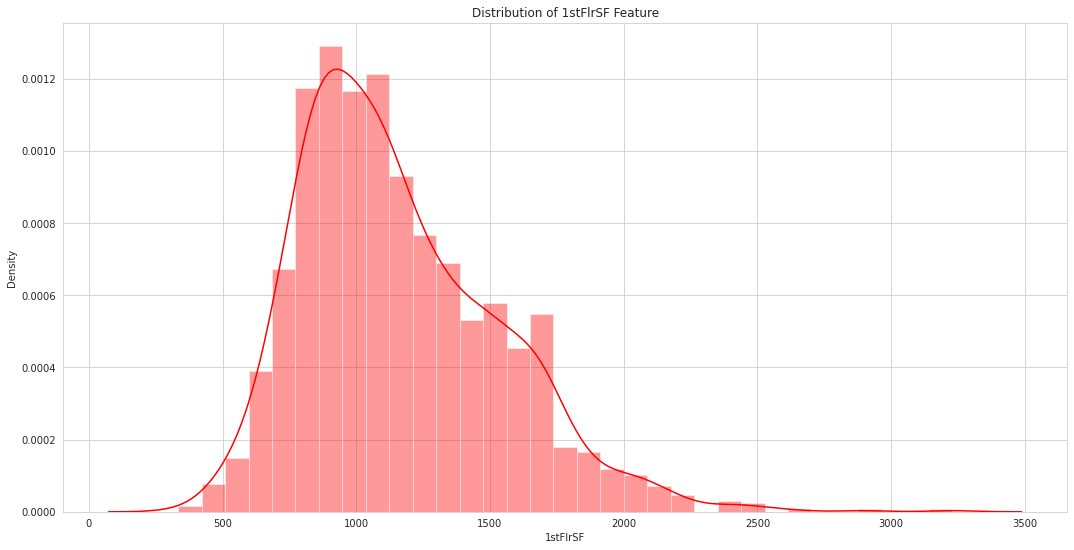

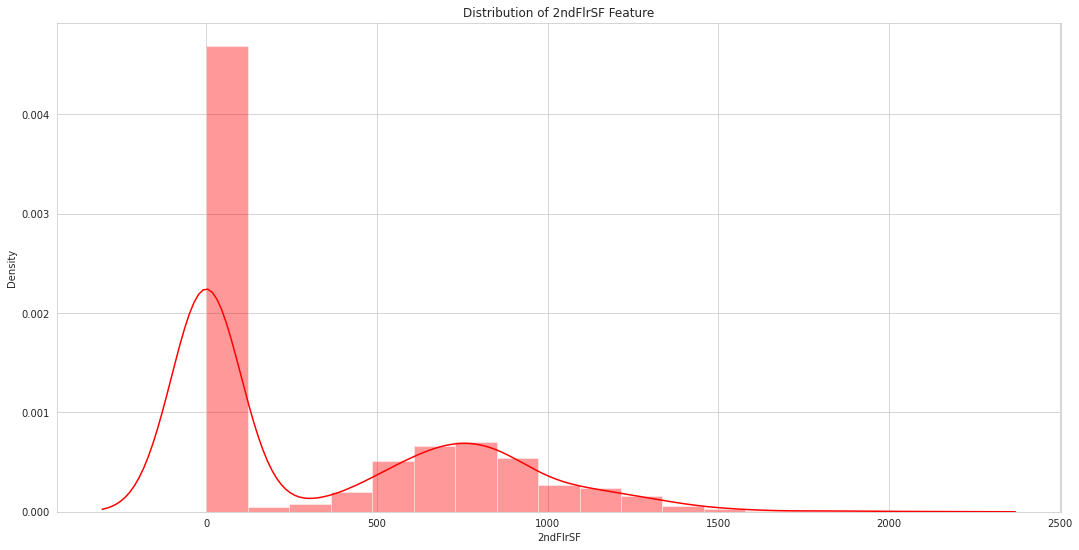

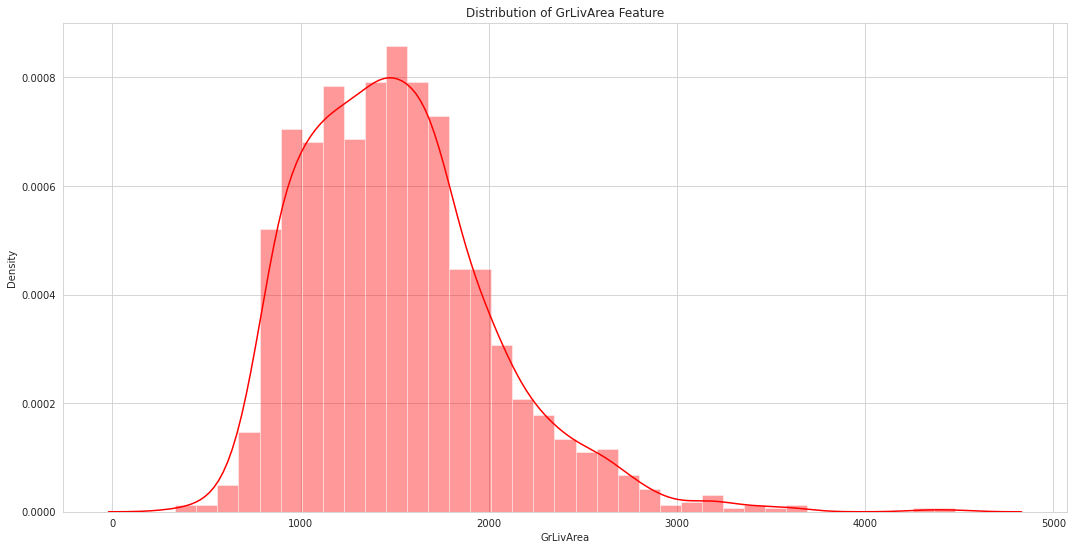

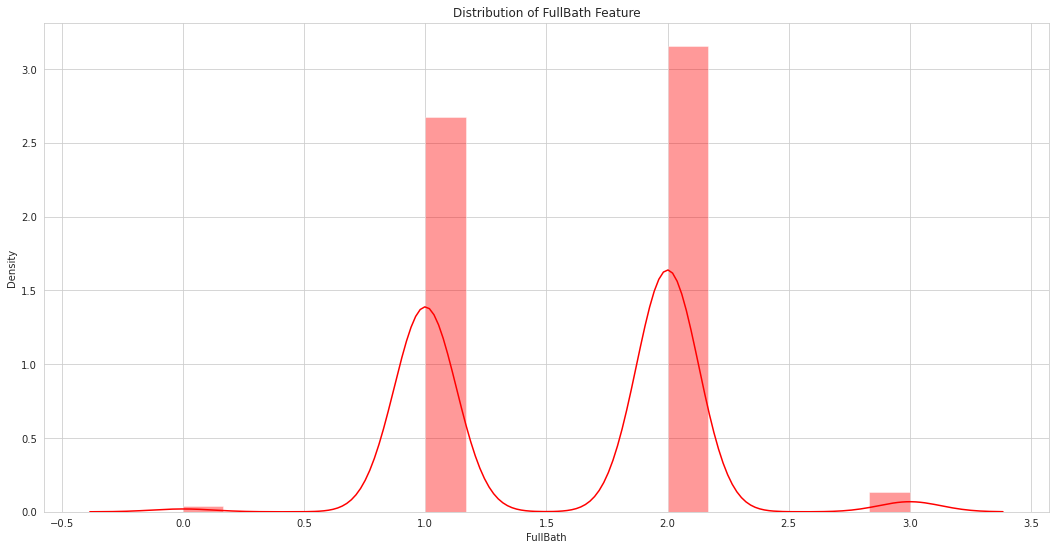

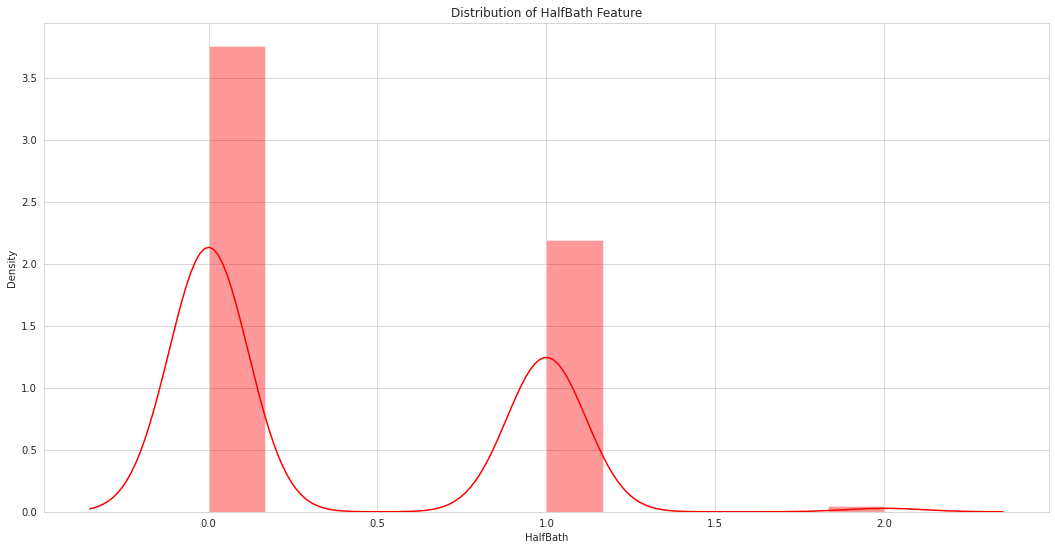

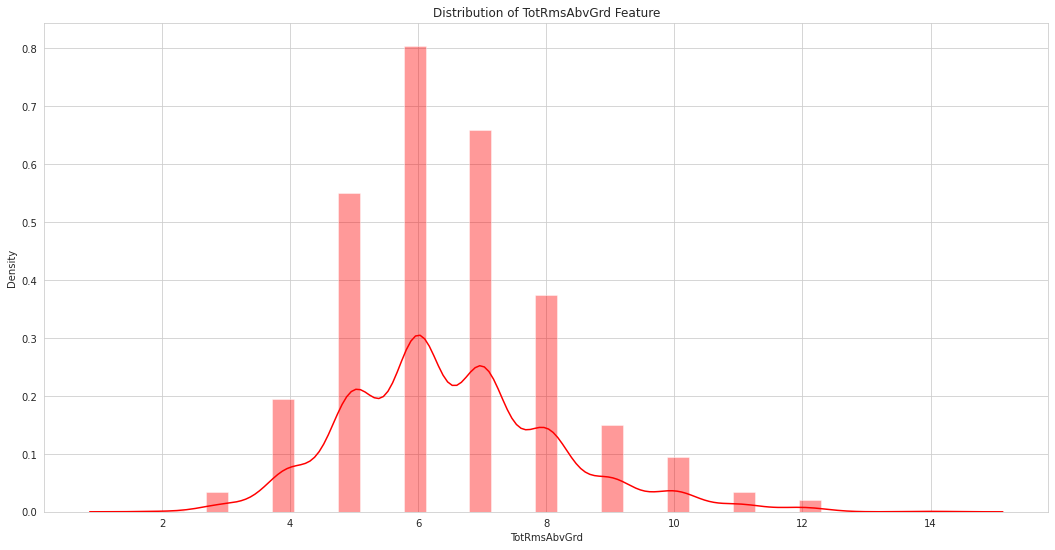

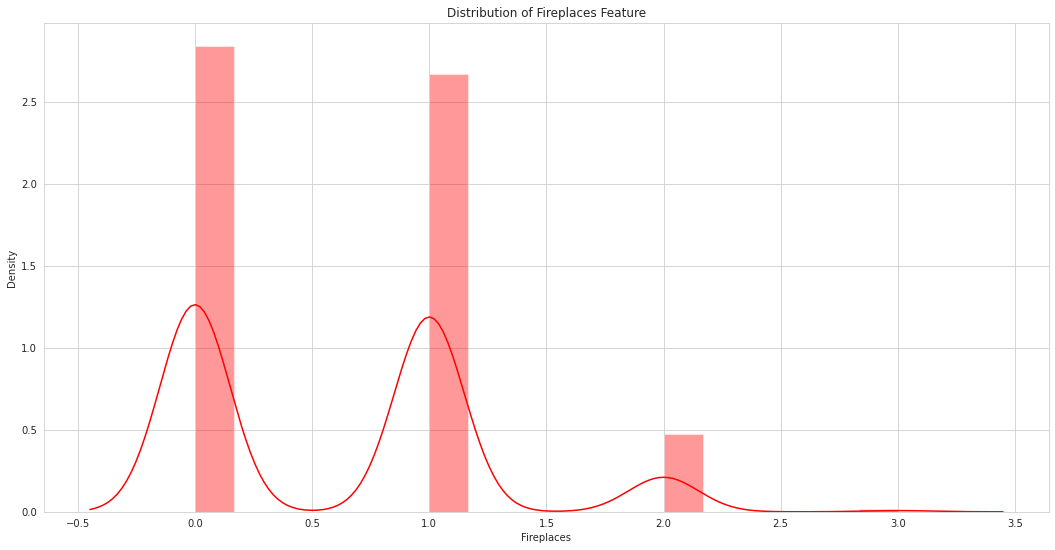

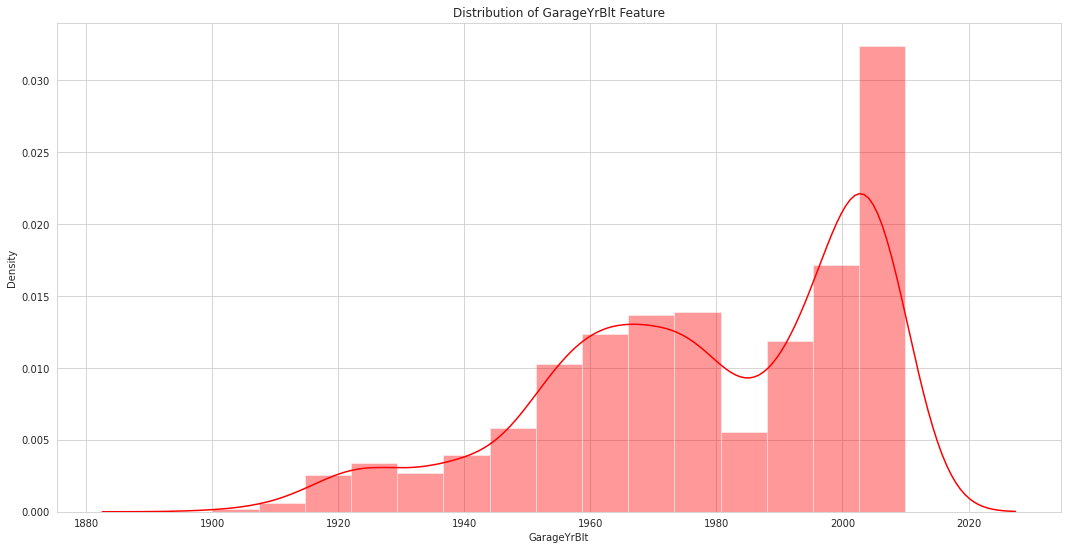

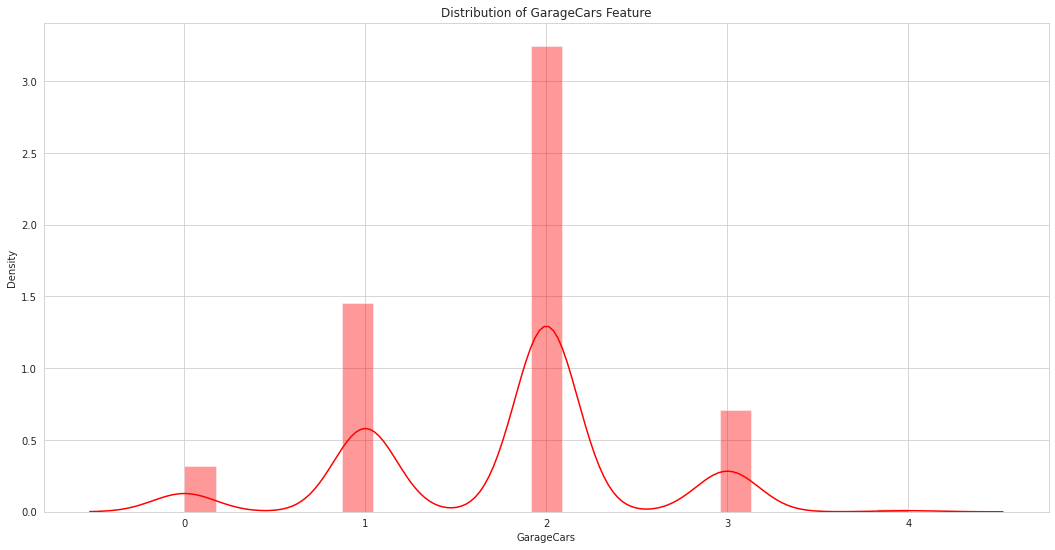

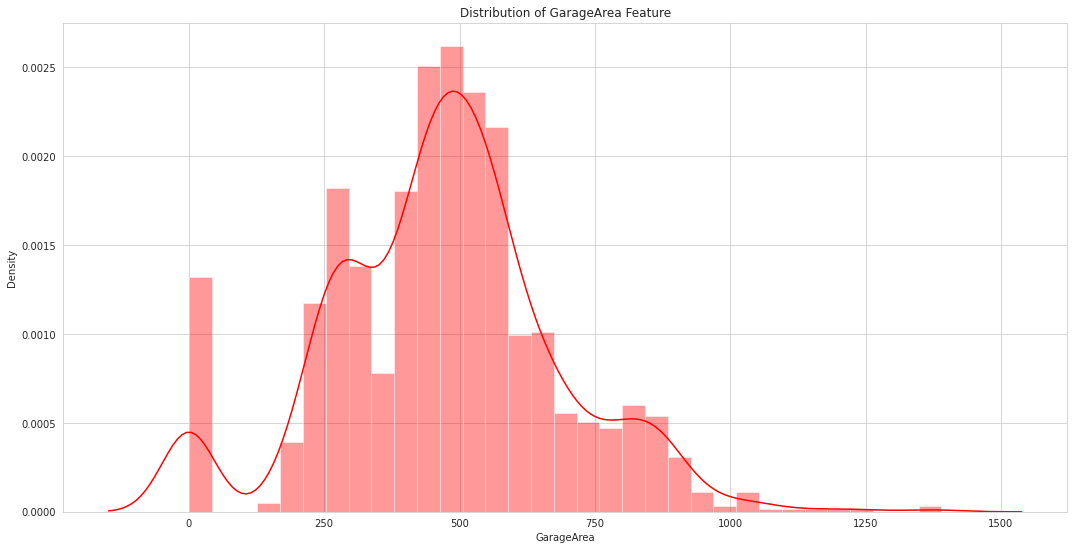

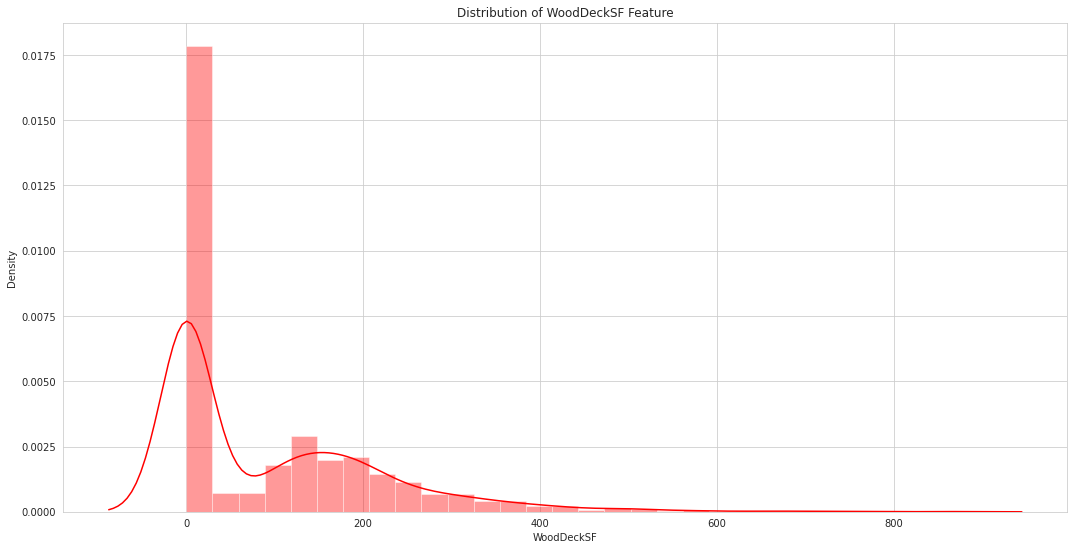

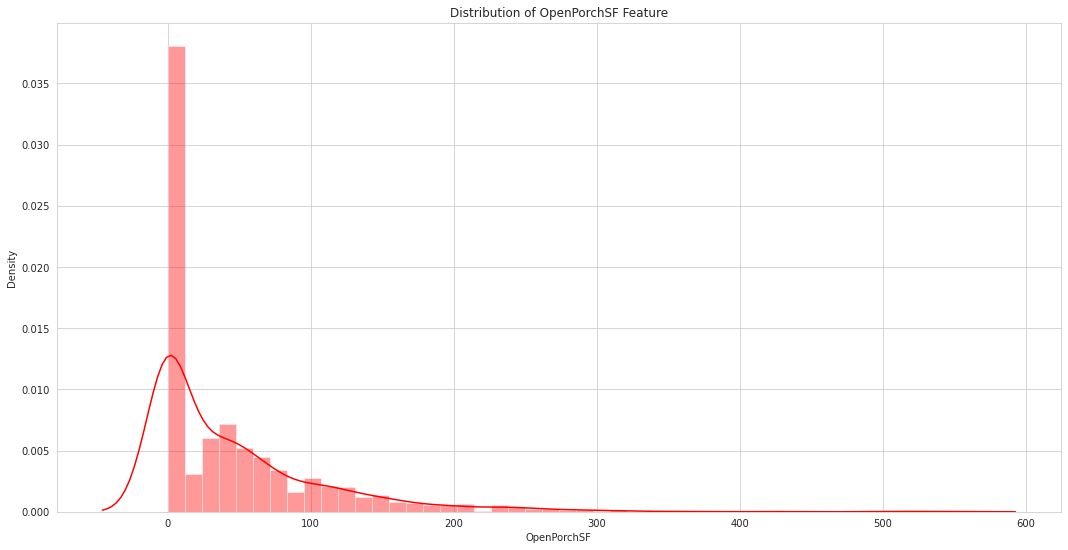

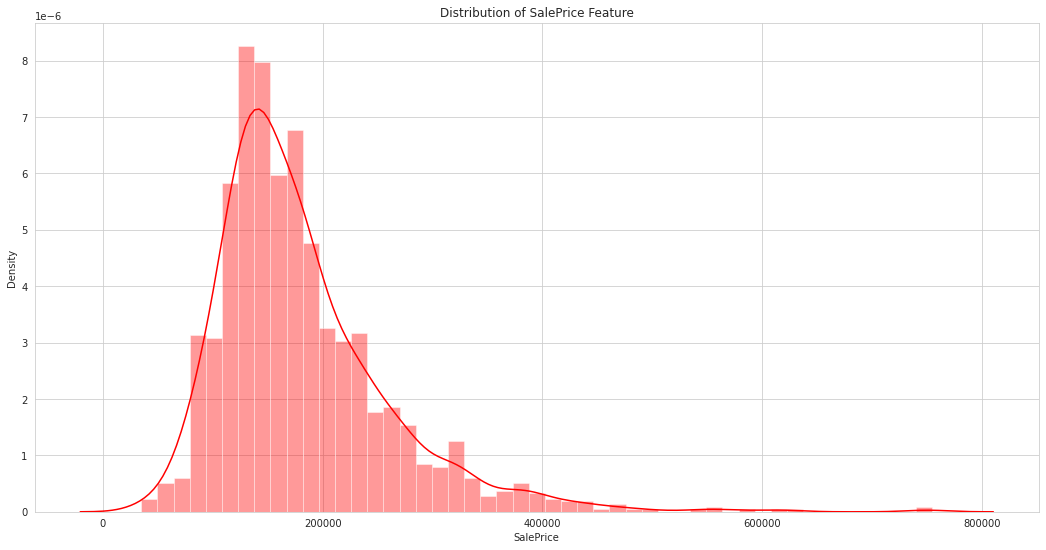

In [ ]:
for col in df_train[selected_features]:
  f, ax = plt.subplots(figsize=(18,9))
  sns.distplot(df_train[col], color="red")
  ax.set(xlabel=f"{col}")
  ax.set(title=f"Distribution of {col} Feature")
  plt.show()

**Normal Distribution in Statistics**

Looking our target variable and features, why we want it in a Normal Distribution way?


`It is the most important probability distribution in statistics because it accurately describes the distribution of values for many natural phenomena. Characteristics that are the sum of many independent processes frequently follow normal distributions.` For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution.

Beacause of that we want to transform in Normal Distribution the following features and target: 

*  sale price (SalePrice)
*  the linear feet of street connected to property (LotFrontage)
*  the lot size (LotArea)
*  the fisrt flor square feet (1stFlrSF)
*  the living area (GrLivArea)


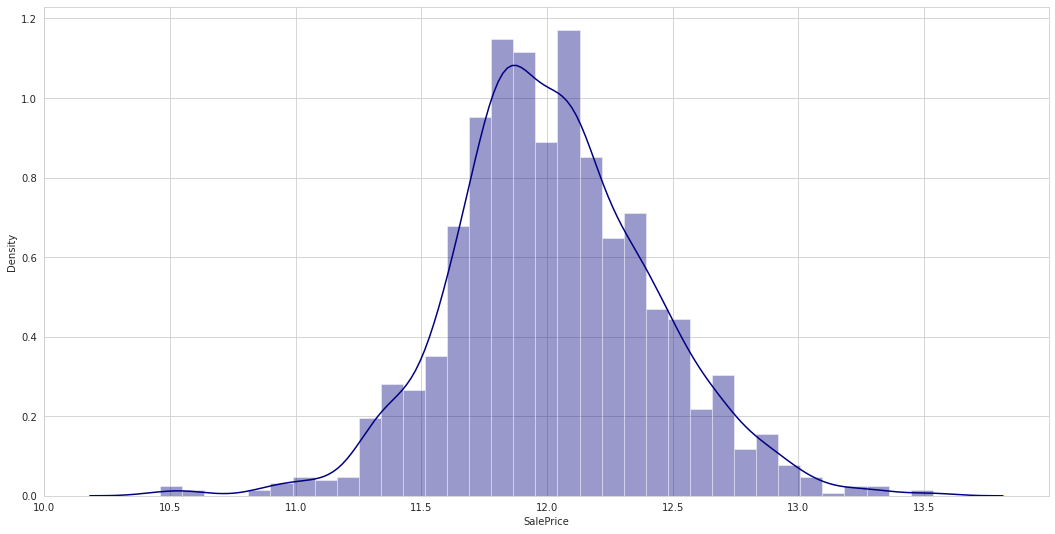

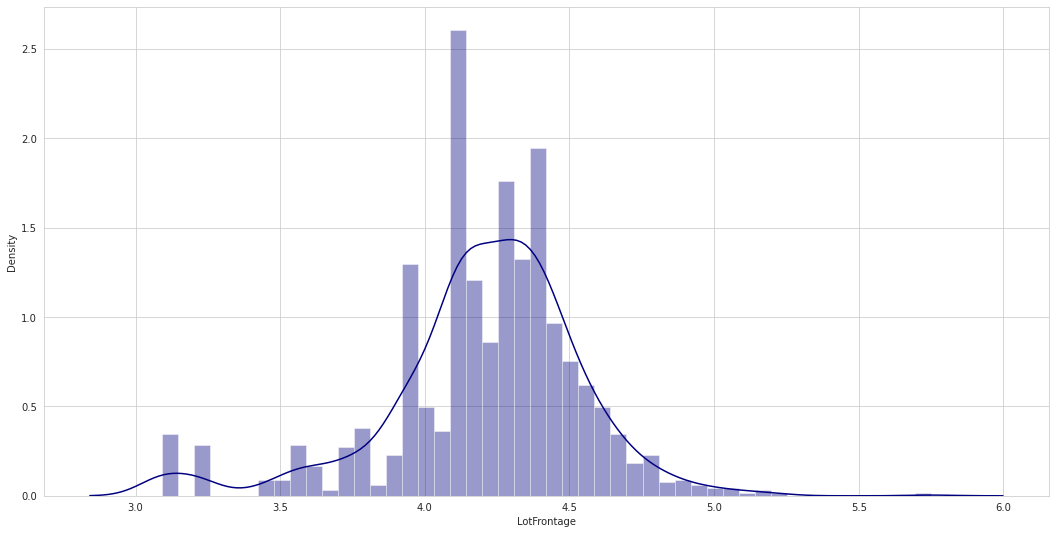

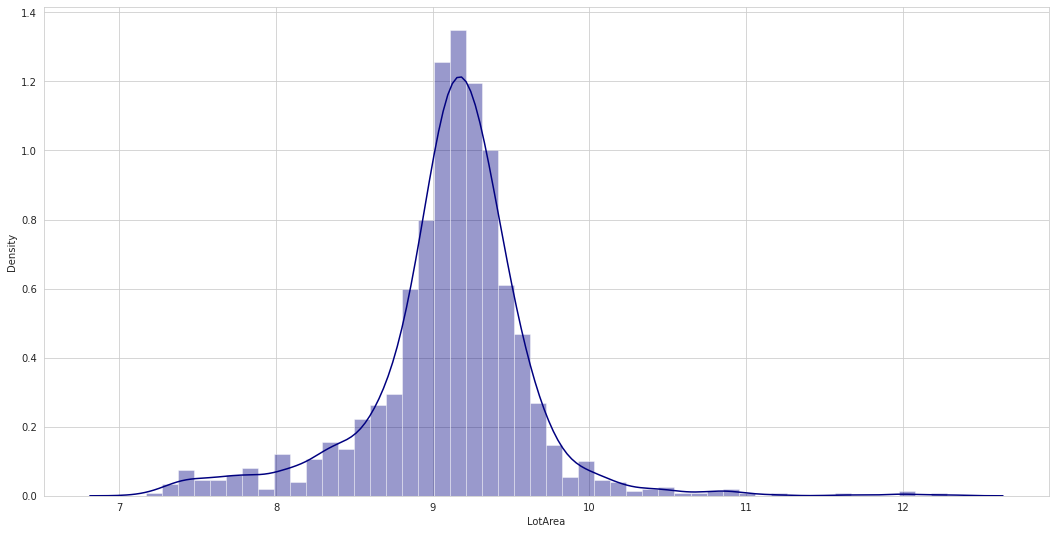

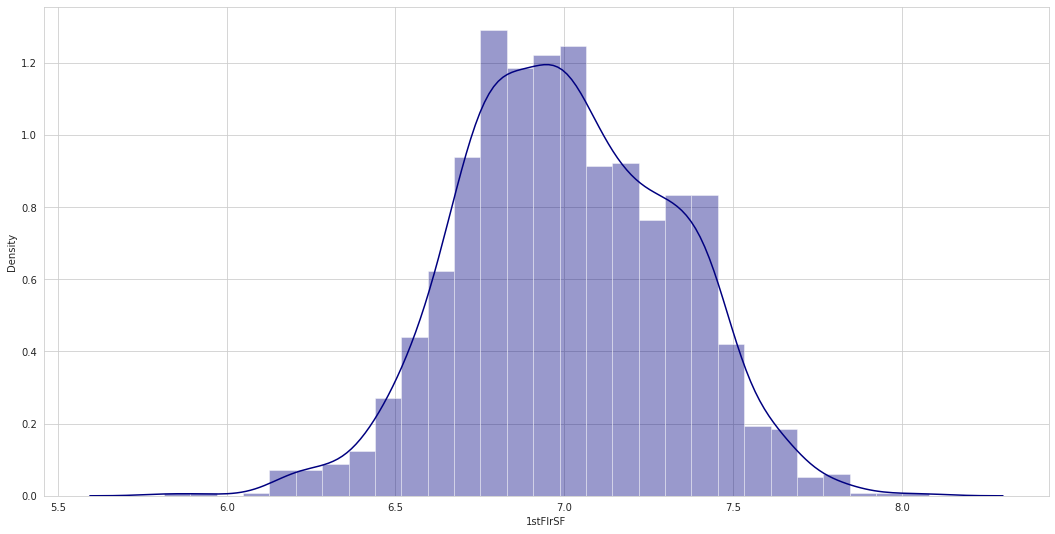

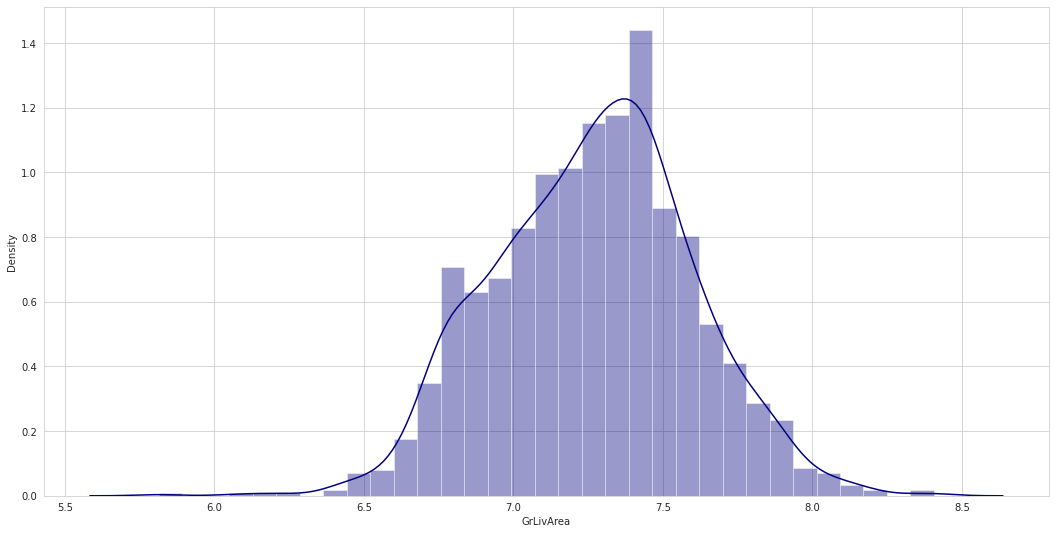

In [ ]:
features_tobe_norm = ['SalePrice', 'LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for f in features_tobe_norm:
  df_train[f] = log1p(df_train[f])

  plt.figure(figsize=((18,9)))
  sns.distplot(df_train[f], color="navy")
  ax.set(xlabel=f"{f}")
  ax.set(title=f"Distribution of {f} Feature")
  plt.show()

# PREPROCESSING


> Missing Values



In [ ]:
selected_features.remove('SalePrice')
numerical_features = selected_features

In [ ]:
y_train = df_train['SalePrice'].values
df_pp = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [ ]:
df_pp[numerical_features].isna().sum()

LotFrontage     486
LotArea           0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       23
BsmtFinSF1        1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
HalfBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt     159
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

<AxesSubplot:>

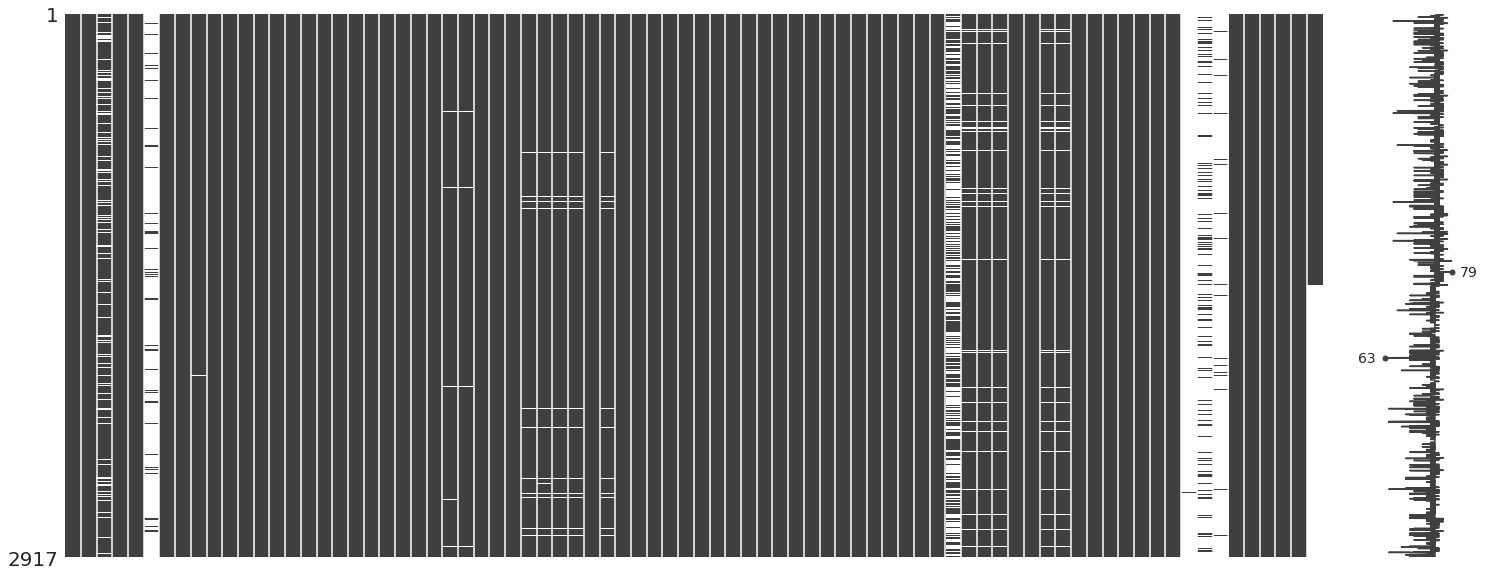

In [ ]:
msno.matrix(df_pp)

In [ ]:
df_pp.drop('SalePrice', axis=1, inplace=True)

In [ ]:
df_pp['LotFrontage'] = df_pp.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_pp['MasVnrArea'] = df_pp.groupby('Neighborhood')['MasVnrArea'].transform(lambda x: x.fillna(x.median()))
df_pp['BsmtFinSF1'] = df_pp.groupby('Neighborhood')['BsmtFinSF1'].transform(lambda x: x.fillna(x.median()))
df_pp['TotalBsmtSF'] = df_pp.groupby('Neighborhood')['TotalBsmtSF'].transform(lambda x: x.fillna(x.median()))
df_pp['GarageYrBlt'] = df_pp.groupby('Neighborhood')['GarageYrBlt'].transform(lambda x: x.fillna(x.median()))
df_pp['GarageCars'] = df_pp.groupby('Neighborhood')['GarageCars'].transform(lambda x: x.fillna(x.median()))
df_pp['GarageArea'] = df_pp.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.median()))

In [ ]:
categorical_features = []

for col in df_pp.columns:
  try:
    if df_pp[col].dtype == 'object':
      categorical_features.append(col)
  except:
    pass

In [ ]:
df_pp[categorical_features].isna().sum()

MSZoning            4
Street              0
Alley            2719
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2908
Fence            2346
MiscFeature      2812
SaleType            1
SaleCondition       0
dtype: int64

In [ ]:
for col in categorical_features:
  df_pp[col] = df_pp[col].fillna('No Info')

## FEATURE ENGINEERING

Adding the year that the house was sold as categorical feature

In [ ]:
df_pp['YrSold'] = df_pp['YrSold'].astype(str)

In [ ]:
categorical_features.append('YrSold')

In [ ]:
encoder = LabelEncoder()

for c in categorical_features:
  df_pp[c] = encoder.fit_transform(df_pp[c])

In [ ]:
skewed_features = df_pp[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for i in skewed_features:
    df_pp[i] = boxcox1p(df_pp[i], lam)


Skew in numerical features: 

There are 20 skewed numerical features to Box Cox transform


In [ ]:
train_id = df_train.shape[0]
test_id = df_test.shape[0]

df_pp = pd.get_dummies(df_pp)
print(df_pp.shape)
train = df_pp[:train_id]
test = df_pp[train_id:]
print(train.shape)
print(test.shape)

(2917, 79)
(1458, 79)
(1459, 79)


In [ ]:
X_train = train[categorical_features+numerical_features]
X_test = test[categorical_features+numerical_features]

# MODELING

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 

In [ ]:
xgbr = XGBRegressor(learning_rate=0.01,
                       n_estimators=8000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [ ]:
lgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=6000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [ ]:
rfr = RandomForestRegressor(n_estimators=7000,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 123).get_n_splits(train.values)

In [ ]:
gbr_mse_cv_scores = - cross_val_score(gbr, X_train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
gbr_rmse_score = np.sqrt(gbr_mse_cv_scores)

xgbr_mse_cv_scores = - cross_val_score(xgbr, X_train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
xgbr_rmse_score = np.sqrt(xgbr_mse_cv_scores)

lgbm_mse_cv_scores = - cross_val_score(lgbm, X_train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
lgbm_rmse_score = np.sqrt(lgbm_mse_cv_scores)

rfr_mse_cv_scores = - cross_val_score(rfr, X_train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
rfr_rmse_score = np.sqrt(rfr_mse_cv_scores)

print('Gradient Boosting Regressor CV RMSE Score :', gbr_rmse_score.mean())
print('XGBoost Regressor CV RMSE Score :', xgbr_rmse_score.mean())
print('LightGBM Regressor CV RMSE Score :', lgbm_rmse_score.mean())
print('Random Forest Regressor CV RMSE Score :', rfr_rmse_score.mean())

Gradient Boosting Regressor CV RMSE Score : 0.12192310718957913
XGBoost Regressor CV RMSE Score : 0.14083146524935627
LightGBM Regressor CV RMSE Score : 0.12373844759429264
Random Forest Regressor CV RMSE Score : 0.14311029192540328


IN THE PREDICTIONS WE WILL PERFORM ( EXPM1 ) THE INVERSE FUNCTION OF (LOG1P) TO GET PRICE ACTUALLY 


In [ ]:
gbr.fit(X_train, y_train)
gbr_train_pred = gbr.predict(X_train)

In [ ]:
gbr_pred = np.expm1(gbr.predict(X_test.values))
rmse_gbr = np.sqrt(mean_squared_error(y_train,gbr_train_pred))
print(rmse_gbr)

0.061250302885941355


In [ ]:
xgbr.fit(X_train,y_train)
xgbr_train_pred = xgbr.predict(X_train)

In [ ]:
xgbr_pred = np.expm1(xgbr.predict(X_test.values))
rmse_xgbr = np.sqrt(mean_squared_error(y_train,xgbr_train_pred))
print(rmse_xgbr)

0.12251528746260149


In [ ]:
lgbm.fit(X_train, y_train)
lgbm_train_pred = lgbm.predict(X_train)

In [ ]:
lgbm_pred = np.expm1(lgbm.predict(X_test.values))
rmse_lgbm = np.sqrt(mean_squared_error(y_train,lgbm_train_pred))
print(rmse_lgbm)

0.060146851079982806


In [ ]:
rfr.fit(X_train, y_train)
rfr_train_pred = rfr.predict(X_train)

In [ ]:
rfr_pred = np.expm1(rfr.predict(X_test.values))
rmse_rfr = np.sqrt(mean_squared_error(y_train,rfr_train_pred))
print(rmse_rfr)

0.09003364605114927


In [ ]:
models = ['Gradient Boosting', 'XGBoost', 'LightGBM', 'Random Forest']

rmse_scores = [rmse_gbr, rmse_xgbr, rmse_lgbm, rmse_rfr]

model_scores = pd.DataFrame({
    
    'Regression Models' : models,
    'RMSE Scores' : rmse_scores
    
})

results = model_scores.sort_values('RMSE Scores', ascending = True, ignore_index= True)
results

,Regression Models,RMSE Scores
0,LightGBM,0.060
1,Gradient Boosting,0.061
2,Random Forest,0.090
3,XGBoost,0.123


# REFERENCES


https://statisticsbyjim.com/basics/normal-distribution/

https://aegis4048.github.io/transforming-non-normal-distribution-to-normal-distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/
